In [90]:
import numpy as np
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import category_encoders as ce
from sklearn.neighbors import KNeighborsRegressor


In [4]:
data=pd.read_csv('Data_Train.csv')

In [5]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [6]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
data.shape

(6019, 12)

In [8]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [9]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

# Univariate analysis


## Location


In [10]:
data.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

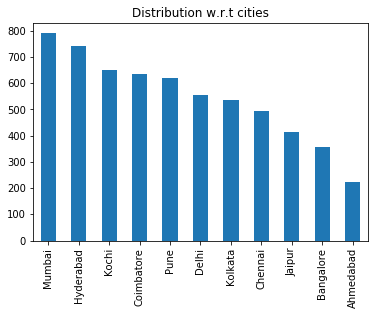

In [11]:
import matplotlib.pyplot as plt
data.Location.value_counts().plot(kind='bar')
plt.title('Distribution w.r.t cities')
plt.show()

## Brand

In [12]:
brand_name=[]
model_name=[]
for index, rows in data.iterrows():
    brand_name.append(rows['Name'].split()[0].lower())
    model_name.append(rows['Name'].split()[1].lower())

In [13]:
data['Brand'] = brand_name


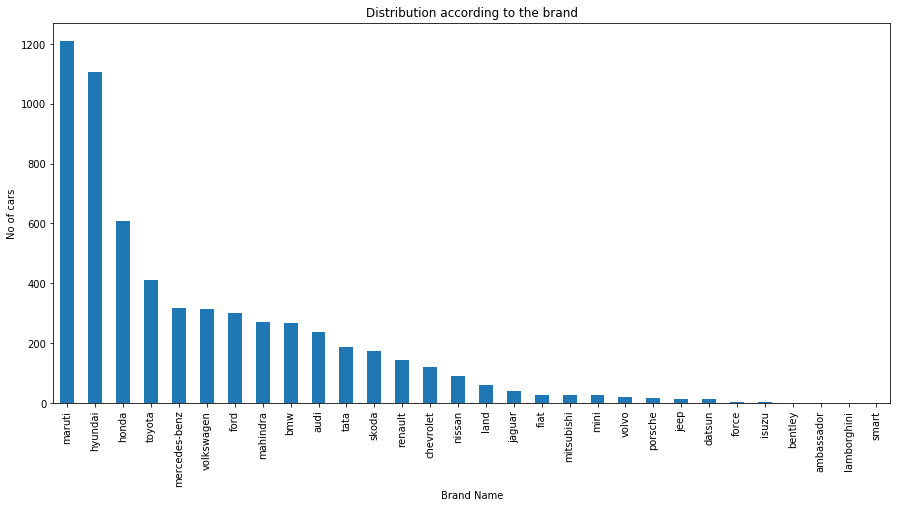

In [14]:
plt.rcParams["figure.figsize"] = [15,7]
data.Brand.value_counts().plot(kind='bar')
plt.xlabel('Brand Name')
plt.ylabel('No of cars')
plt.title('Distribution according to the brand')
plt.show()

# Year

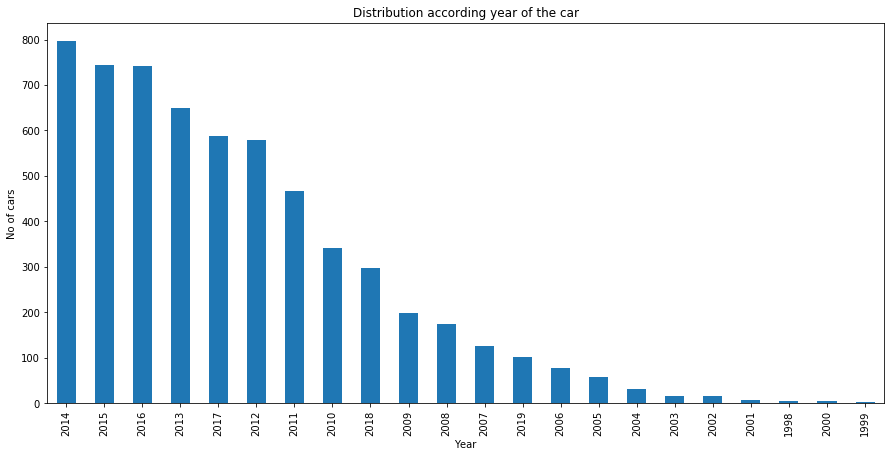

In [15]:
data.Year.value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('No of cars')
plt.title('Distribution according year of the car')
plt.show()

#### Most of the cars are bought in 2014

# Outlier Identification and Null Value Filling

## Kilometers Driven

In [16]:
import numpy as np

p=[]
for i in range(1,101,1):
    p.append(np.percentile(data.Kilometers_Driven, i))

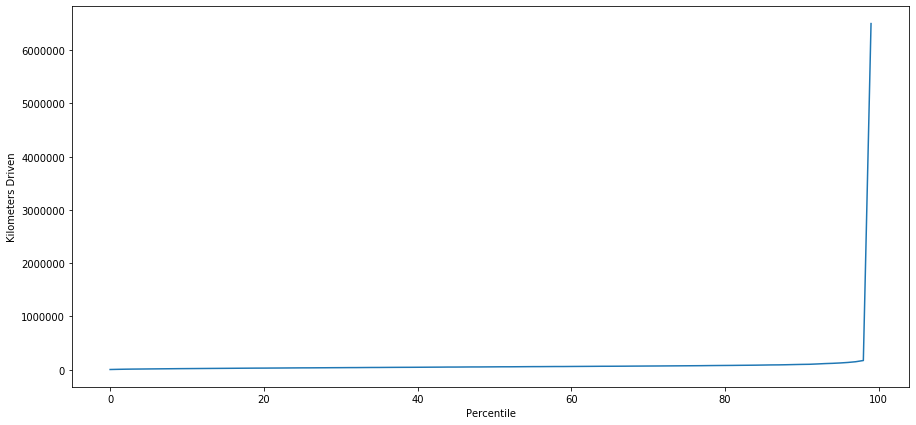

In [17]:
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Kilometers Driven')
plt.show()

As we see some kind of outlier in between 90th to 100th percentile so let's Zoom in


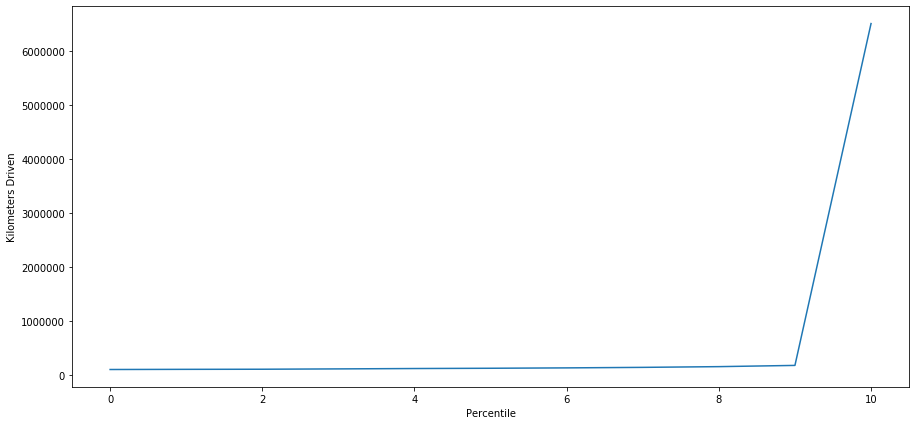

In [18]:
p=[]
for i in range(90,101,1):
    p.append(np.percentile(data.Kilometers_Driven, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Kilometers Driven')
plt.show()



In [19]:
data[data['Kilometers_Driven']>600000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,7.5,skoda
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.7,hyundai
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.9,volkswagen
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.0,bmw


In [20]:
q=[]
for i in range(1,101,1):
    q.append(np.percentile(data.Price, i))

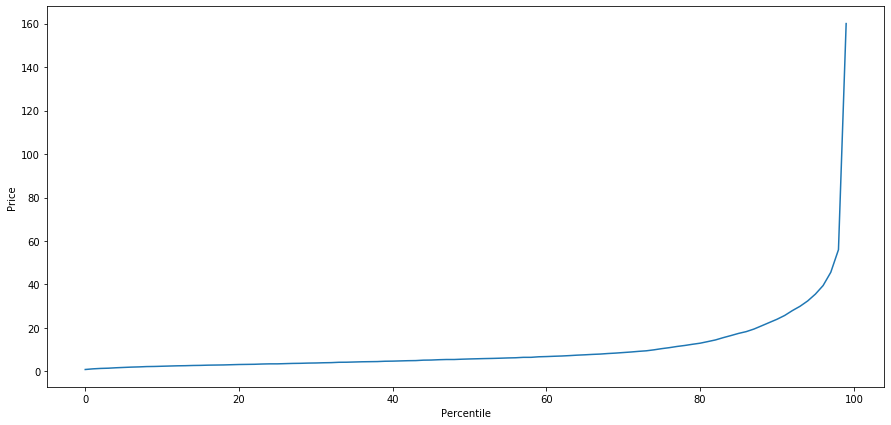

In [21]:
plt.plot(q)
plt.xlabel('Percentile')
plt.ylabel('Price')
plt.show()

As we see some kind of outlier in between 90th to 100th percentile so let's Zoom in

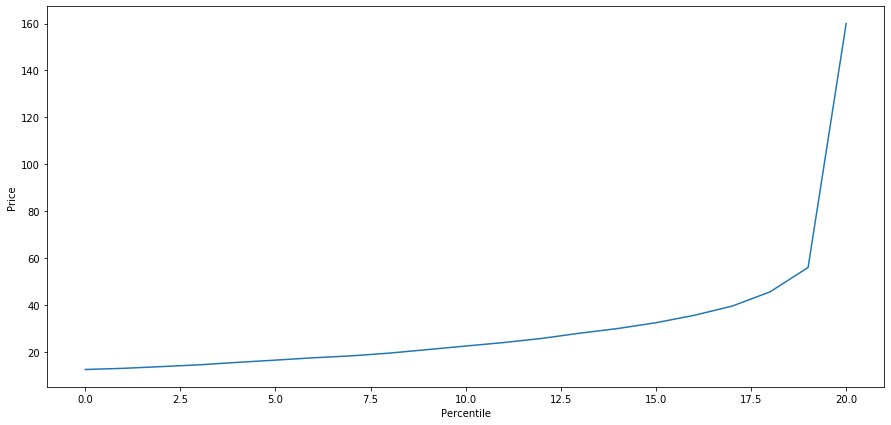

In [22]:
p=[]
for i in range(80,101,1):
    p.append(np.percentile(data.Price, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Price')
plt.show()

In [23]:
data[data['Price']>150]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33 kmpl,2993 CC,255 bhp,5.0,160.0,land


# Fuel_Type

In [24]:
data.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

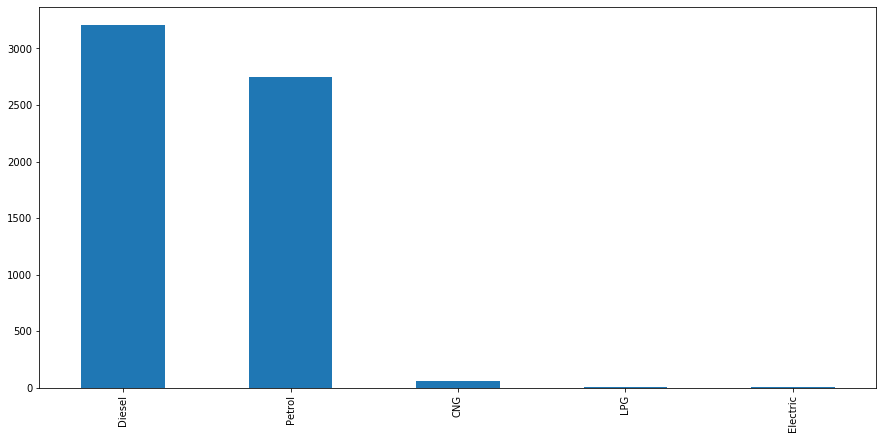

In [25]:
data.Fuel_Type.value_counts().plot(kind='bar')

##### Diesel cars are more in number

# Transmission

In [26]:
data.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

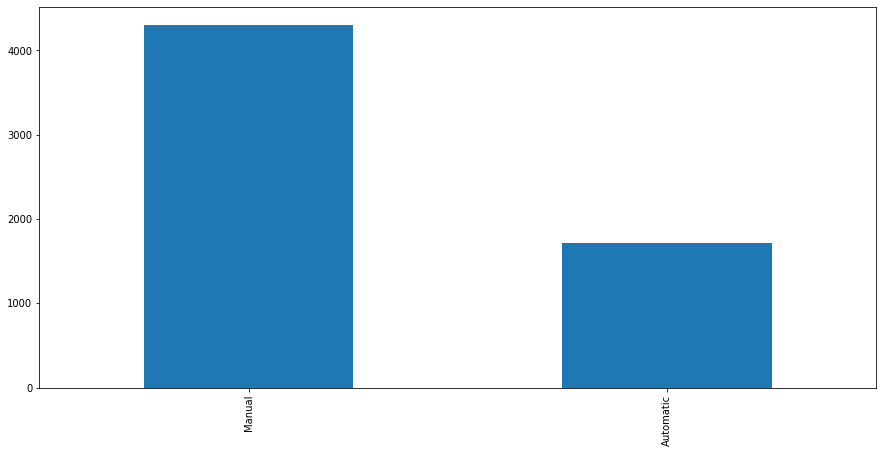

In [27]:
data.Transmission.value_counts().plot(kind='bar')

##### Manual cars are more than Automatic cars


# Owner_type

In [28]:
data.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64


# Mileage

In [29]:
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,mahindra
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,toyota


In [30]:
data['is_electric']=data['Fuel_Type'].apply(lambda x: 1 if x=='Electric' else 0)

In [31]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,is_electric
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,maruti,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,hyundai,0


##  Removig the CC,bhp,km/kg Units

In [32]:
Mileage_cleaned=[]
Engine_cleaned=[]
power_cleaned=[]
for index, rows in data.iterrows():
    try:
        Mileage_cleaned.append(rows['Mileage'].split()[0])
    except:
        Mileage_cleaned.append(0)
    try:
        Engine_cleaned.append(rows['Engine'].split()[0])
    except:
        Engine_cleaned.append(0)
    try:
        if rows['Power'].split()[0]=='null':
            power_cleaned.append(0)
        else:
            power_cleaned.append(rows['Power'].split()[0])
    except:
        power_cleaned.append(0)

In [33]:
data['Mileage_cleaned']=Mileage_cleaned
data.Mileage_cleaned = data.Mileage_cleaned.astype(float)
data['Engine_cleaned']=Engine_cleaned
data.Engine_cleaned = data.Engine_cleaned.astype(float)
data['Power_cleaned']=power_cleaned
data.Power_cleaned = data.Power_cleaned.astype(float)

In [34]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,maruti,0,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,hyundai,0,19.67,1582.0,126.20


## Filling null values

#### Mileage


In [35]:
Mileage_missing=[]
for i,j in data[(data['Mileage_cleaned']==0)].iterrows():
    if j.Engine_cleaned!=0:
        if j.Power_cleaned!=0:
            Mileage_missing.append(data[(data.Power_cleaned.between(j.Power_cleaned-50,j.Power_cleaned+50)) & (data.Engine_cleaned.between(j.Engine_cleaned-100,j.Engine_cleaned+100))]['Mileage_cleaned'].mean())
        else:
            Mileage_missing.append(data[(data.Engine_cleaned.between(j.Engine_cleaned-100,j.Engine_cleaned+100))]['Mileage_cleaned'].mean())
    else:
        if j.Power_cleaned!=0:
            Mileage_missing.append(data[(data.Power_cleaned.between(j.Power_cleaned-50,j.Power_cleaned+50))]['Mileage_cleaned'].mean())
        else:
            Mileage_missing.append(0)

In [36]:
j=0
for i in data[(data['Mileage_cleaned']==0)]['Mileage_cleaned'].index.tolist():
    data['Mileage_cleaned'].iloc[i]=Mileage_missing[j]
    j+=1

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [37]:
data.Mileage_cleaned[data.Mileage_cleaned == 0] = data['Mileage_cleaned'].mean()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
data['Mileage_cleaned'].describe()

count    6019.000000
mean       18.328940
std         4.169318
min         6.400000
25%        15.300000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage_cleaned, dtype: float64

In [39]:
mileage_mean=data['Mileage_cleaned'].mean()

In [40]:
data["Mileage"].fillna(mileage_mean, inplace = True)

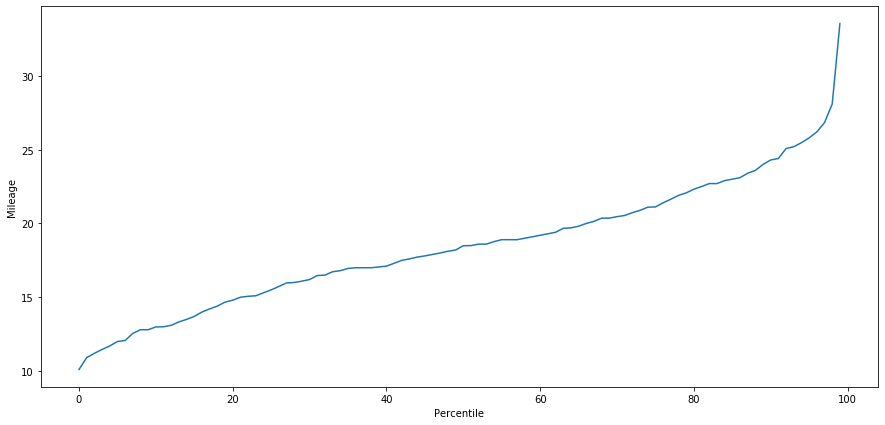

In [41]:
p=[]
for i in range(1,101,1):
    p.append(np.percentile(data.Mileage_cleaned, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Mileage')
plt.show()

As we see some kind of outlier in between 90th to 100th percentile so let's Zoom in

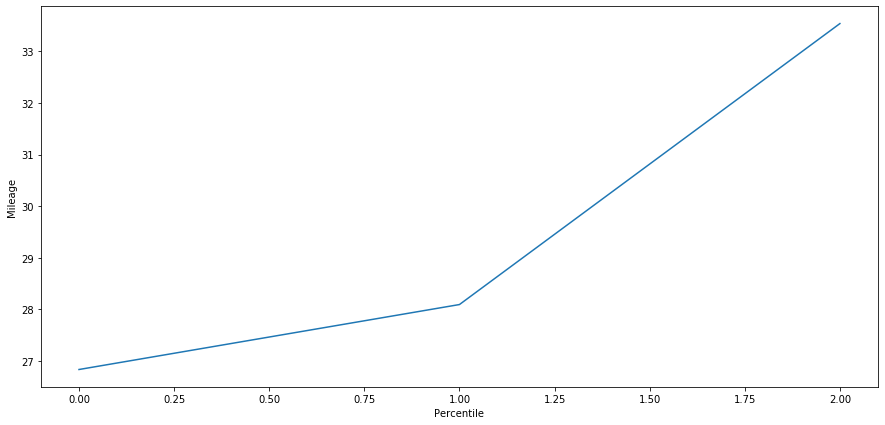

In [42]:
p=[]
for i in range(98,101,1):
    p.append(np.percentile(data.Mileage_cleaned, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Mileage')
plt.show()

In [43]:
data[data['Mileage_cleaned']>33]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.0,3.50,maruti,0,33.44,796.0,40.30
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,2.96,maruti,0,33.54,998.0,67.04
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,3.05,maruti,0,33.54,998.0,67.04
2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,3.90,maruti,0,33.54,998.0,67.04
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,3.25,maruti,0,33.54,998.0,67.04
3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.0,3.00,maruti,0,33.44,796.0,40.30
3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537,CNG,Manual,Second,33.44 km/kg,796 CC,40.3 bhp,4.0,2.10,maruti,0,33.44,796.0,40.30
4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,2.85,maruti,0,33.54,998.0,67.04
4769,Maruti Alto 800 2016-2019 CNG LXI,Kochi,2017,24310,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.0,3.70,maruti,0,33.44,796.0,40.30


#### Engine

In [44]:
manual_petrol = data[(data['Fuel_Type']=='Petrol') & (data['Transmission']=='Manual')].Engine_cleaned.mean()
manual_diesel = data[(data['Fuel_Type']=='Diesel') & (data['Transmission']=='Manual')].Engine_cleaned.mean()
auto_diesel = data[(data['Fuel_Type']=='Diesel') & (data['Transmission']=='Automatic')].Engine_cleaned.mean()
auto_petrol = data[(data['Fuel_Type']=='Petrol') & (data['Transmission']=='Automatic')].Engine_cleaned.mean()

In [45]:
data.Engine_cleaned.loc[(data['Fuel_Type']=='Petrol') & (data['Transmission']=='Manual') & (data['Engine_cleaned']==0)] = manual_petrol
data.Engine_cleaned.loc[(data['Fuel_Type']=='Diesel') & (data['Transmission']=='Manual') & (data['Engine_cleaned']==0)] = manual_diesel
data.Engine_cleaned.loc[(data['Fuel_Type']=='Diesel') & (data['Transmission']=='Automatic') & (data['Engine_cleaned']==0)] = auto_diesel
data.Engine_cleaned.loc[(data['Fuel_Type']=='Petrol') & (data['Transmission']=='Automatic') & (data['Engine_cleaned']==0)] = auto_petrol

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
data['Engine_cleaned'].describe()

count    6019.000000
mean     1620.273483
std       600.566802
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine_cleaned, dtype: float64

In [47]:
engine_mean=data['Engine_cleaned'].mean()

In [48]:
data["Engine"].fillna(engine_mean, inplace = True)

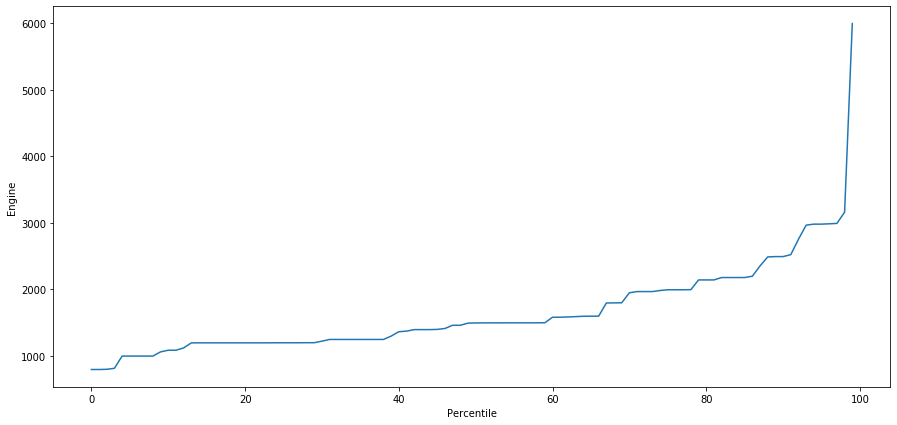

In [49]:
p=[]
for i in range(1,101,1):
    p.append(np.percentile(data.Engine_cleaned, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Engine')
plt.show()

As we see some kind of outlier in between 90th to 100th percentile so let's Zoom in

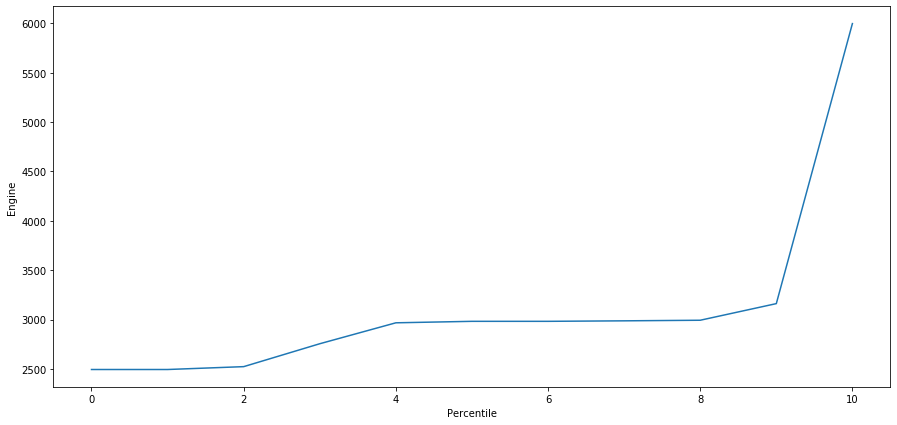

In [50]:
p=[]
for i in range(90,101,1):
    p.append(np.percentile(data.Engine_cleaned, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Engine')
plt.show()

In [51]:
data[data['Engine_cleaned']>5500]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
5521,Bentley Continental Flying Spur,Hyderabad,2006,48000,Petrol,Automatic,First,8.6 kmpl,5998 CC,552 bhp,4.0,59.0,bentley,0,8.6,5998.0,552.0


#### Power

In [52]:
data[data.Power_cleaned == 0].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,2.00,ford,0,17.800000,1399.0,0.0
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30,hyundai,0,19.988571,1086.0,0.0
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,2.10,hyundai,0,17.000000,1086.0,0.0
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,0.85,hyundai,0,17.000000,1086.0,0.0
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,1.67,hyundai,0,17.000000,1086.0,0.0


In [53]:
Power_missing=[]
for i,j in data[(data['Power_cleaned']==0)].iterrows():
    Power_missing.append(data[(data.Mileage_cleaned.between(j.Mileage_cleaned-20,j.Mileage_cleaned+20)) 
                                      & (data.Engine_cleaned.between(j.Engine_cleaned-200,j.Engine_cleaned+200))]
                           ['Power_cleaned'].mean())

In [54]:
data['Power_cleaned'].describe()

count    6019.000000
mean      110.562372
std        55.956041
min         0.000000
25%        74.000000
50%        91.100000
75%       138.030000
max       560.000000
Name: Power_cleaned, dtype: float64

In [55]:
j=0
for i in data[(data['Power_cleaned']==0)]['Power_cleaned'].index.tolist():
    data['Power_cleaned'].iloc[i]=Power_missing[j]
    j+=1

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [56]:
power_mean=data['Power_cleaned'].mean()

In [57]:
data["Power"].fillna(power_mean, inplace = True)

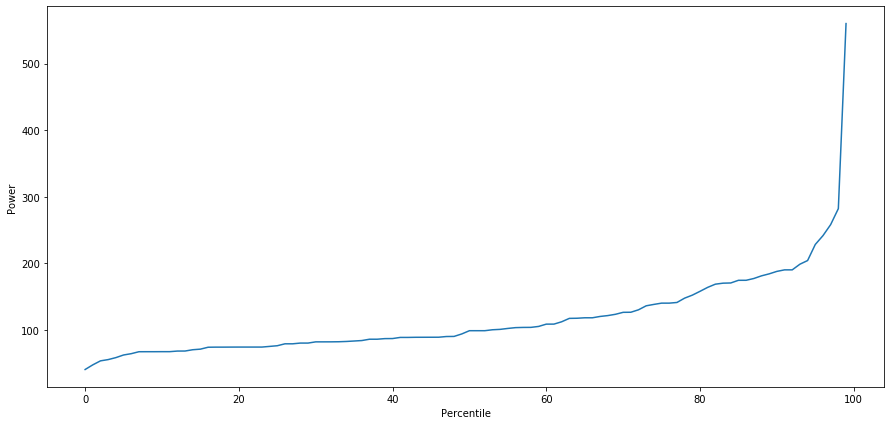

In [58]:
p=[]
for i in range(1,101,1):
    p.append(np.percentile(data.Power_cleaned, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Power')
plt.show()

As we see some kind of outlier in between 90th to 100th percentile so let's Zoom in

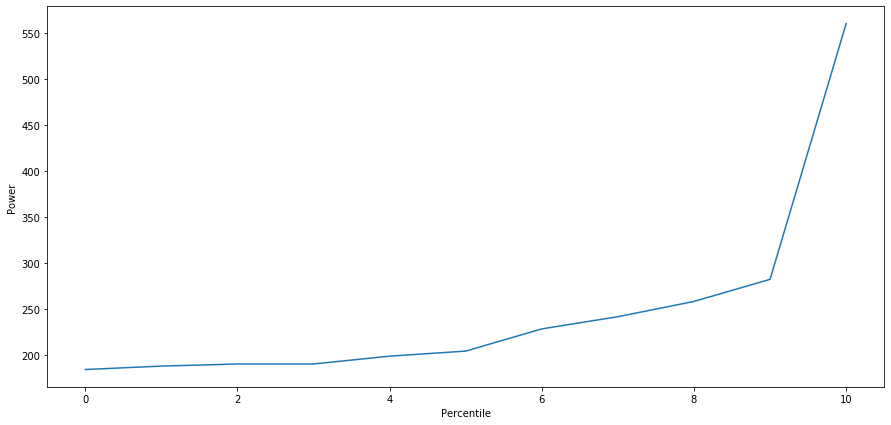

In [59]:
p=[]
for i in range(90,101,1):
    p.append(np.percentile(data.Power_cleaned, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Power')
plt.show()

In [60]:
data[data['Power_cleaned']>550]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
5521,Bentley Continental Flying Spur,Hyderabad,2006,48000,Petrol,Automatic,First,8.6 kmpl,5998 CC,552 bhp,4.0,59.0,bentley,0,8.6,5998.0,552.0
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4 kmpl,5204 CC,560 bhp,2.0,120.0,lamborghini,0,6.4,5204.0,560.0


## Seats


In [61]:
data.Seats.mean()

5.278735151413753

In [62]:
seats_missing=[]
for i,j in data[(data.Seats.isnull()) | (data.Seats== 0)].iterrows():
    seats_missing.append(data[data['Name'].str.match(" ".join((j['Name'].split()[0],j['Name'].split()[1])))]['Seats'].mean())

In [63]:
j=0
for i in data[(data.Seats.isnull()) | (data.Seats== 0)].index.tolist():
    data['Seats'].iloc[i]=seats_missing[j]
    j+=1

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [64]:
data.Seats[data.Seats == 0] = data['Seats'].mean()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
data = data.dropna()

In [66]:
seats_list=data["Seats"].values.tolist()

In [67]:
seats_mean = round(np.nanmean(seats_list, axis = 0))

In [68]:
data["Seats"].fillna(seats_mean, inplace = True)

### The null values were replaced by the mean of their respective columns as this is a better solution than removing rows or columns(loss of data), so this method yields better results.
### As the given data sets does not have a large number of outliers in each column(less than 1%), so replacing the null values with mean made more sense.

# One Hot Encoding (Categorical variables)

In [69]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,maruti,0,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,hyundai,0,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,honda,0,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,maruti,0,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,audi,0,15.20,1968.0,140.80


In [70]:
data_cop = data.copy()

In [71]:
data_target = data['Price']
data_final = data.drop(['Name','Mileage','Engine','Power','Price'],axis=1)

In [72]:
data_final.columns


Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Brand', 'is_electric', 'Mileage_cleaned',
       'Engine_cleaned', 'Power_cleaned'],
      dtype='object')

In [73]:
data_final.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
0,Mumbai,2010,72000,CNG,Manual,First,5.0,maruti,0,26.60,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,hyundai,0,19.67,1582.0,126.20
2,Chennai,2011,46000,Petrol,Manual,First,5.0,honda,0,18.20,1199.0,88.70
3,Chennai,2012,87000,Diesel,Manual,First,7.0,maruti,0,20.77,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,audi,0,15.20,1968.0,140.80


## Data Scaling and Train test split

In [74]:
for i in ['Kilometers_Driven','Mileage_cleaned','Engine_cleaned', 'Power_cleaned']:
    data_final[i] = MinMaxScaler(feature_range=(0,1)).fit_transform(data_final[i].values.astype(float).reshape(-1,1))

In [75]:
X_train, X_test, y_train, y_test = train_test_split(data_final, data_target, test_size=0.33)

In [76]:
X_train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
564,Jaipur,2015,0.009765,Diesel,Manual,First,5.0,honda,0,0.770081,0.240634,0.122480
631,Chennai,2002,0.010743,Petrol,Manual,Third,5.0,hyundai,0,0.500684,0.171110,0.075707
2173,Chennai,2012,0.008435,Diesel,Manual,First,5.0,volkswagen,0,0.316875,0.307796,0.134652
509,Bangalore,2015,0.005205,Diesel,Automatic,First,7.0,mahindra,0,0.353721,0.355552,0.201217
5711,Hyderabad,2015,0.011722,Diesel,Manual,First,5.0,hyundai,0,0.648489,0.176848,0.068087
...,...,...,...,...,...,...,...,...,...,...,...,...
2634,Pune,2005,0.013974,Petrol,Manual,Third,5.0,hyundai,0,0.383198,0.214141,0.092811
5237,Kochi,2018,0.008177,Petrol,Manual,First,5.0,hyundai,0,0.346352,0.256328,0.165652
5999,Chennai,2016,0.001512,Petrol,Manual,First,5.0,tata,0,0.411570,0.189166,0.103652
448,Hyderabad,2014,0.010282,Diesel,Manual,First,5.0,tata,0,0.585851,0.198448,0.075694


In [77]:
X_test

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
3512,Kochi,2017,0.009481,Petrol,Manual,First,5.0,honda,0,0.420044,0.190010,0.099848
2366,Kolkata,2014,0.004128,Petrol,Manual,First,5.0,toyota,0,0.290346,0.291259,0.197471
3389,Kolkata,2012,0.004141,Diesel,Automatic,First,5.0,audi,0,0.446942,0.319946,0.292012
3761,Pune,2016,0.005821,Petrol,Automatic,First,5.0,maruti,0,0.615328,0.156261,0.062457
3651,Kolkata,2016,0.006942,Diesel,Manual,First,5.0,maruti,0,0.689020,0.198448,0.103271
...,...,...,...,...,...,...,...,...,...,...,...,...
5382,Delhi,2015,0.005666,Diesel,Automatic,First,5.0,land,0,0.232130,0.355552,0.291936
3949,Kolkata,2013,0.003358,Diesel,Manual,First,5.0,ford,0,0.501105,0.223928,0.064283
3774,Kochi,2018,0.001601,Petrol,Manual,First,5.0,maruti,0,0.558585,0.234560,0.131324
179,Jaipur,2012,0.013513,Diesel,Manual,First,5.0,chevrolet,0,0.701548,0.145798,0.044504


In [78]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4030, 12), (1986, 12), (4030,), (1986,))

### Converting train to one hot encoding

In [97]:
encoded = ce.OneHotEncoder(handle_unknown='ignore',use_cat_names=True)
encoded.fit(data_final)

OneHotEncoder(cols=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
                    'Brand'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='ignore', return_df=True, use_cat_names=True,
              verbose=0)

In [98]:
X_train_encoded=encoded.transform(X_train)

In [81]:
X_train_encoded.head()

,Location_Mumbai,Location_Pune,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Delhi,Location_Bangalore,...,Brand_smart,Brand_ambassador,Brand_isuzu,Brand_force,Brand_bentley,Brand_lamborghini,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
564,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.770081,0.240634,0.122480
631,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.500684,0.171110,0.075707
2173,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.316875,0.307796,0.134652
509,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.353721,0.355552,0.201217
5711,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.648489,0.176848,0.068087


In [82]:
X_test_encoded=encoded.transform(X_test)

In [83]:
X_test_encoded.shape

(1986, 59)

In [84]:
for i in X_train_encoded.columns:
    if len(X_train_encoded[X_train_encoded[i].isnull()].index)>0:
        print(i,' Has Null values count : ',len(X_train_encoded[X_train_encoded[i].isnull()].index))

# Linear Regression

In [85]:
linearRegression = LinearRegression()
linearRegression.fit(X_train_encoded, y_train)
y_pred = linearRegression.predict(X_test_encoded)
r2_score(y_test, y_pred)

0.7810514707853553

Error metrics when Linear Regression is used

In [86]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  2.830130837739174
Mean Squared  Error      :  24.678546309973033
Root Mean Squared  Error :  4.967750628803043
R Squared Error          :  0.7810514707853553


# Random Forest

In [87]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train_encoded, y_train)
y_pred = rf.predict(X_test_encoded)
r2_score(y_test, y_pred)

0.9066130476571647

Error metric when random forest method is used

In [88]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  1.43242937868652
Mean Squared  Error      :  10.526009178534169
Root Mean Squared  Error :  3.2443811703519314
R Squared Error          :  0.9066130476571647


## Random Forest give better accuracy as compared to Linear Regression